# Visualize Convolutions (filters) in CNNs

In this notebook, the goal is to visualize convolutions graphically. We train a simple CNN on the Fashion-MNIST dataset in order to see how convolutions extract features from images.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Build and train a simple CNN

In [2]:

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (val_images, val_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
val_images=val_images.reshape(10000, 28, 28, 1)
val_images=val_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, validation_data=(val_images, val_labels), epochs=20)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 20)                3

In [6]:
# find indicies of dresses in the datase
print(np.where(val_labels==3)[0][:20])


#sandals label = 5
#shoes label = 9
#dress label = 3

[ 13  29  32  33  42  67  75  86  91 100 124 159 162 176 182 194 197 215
 259 266]


In [7]:
print(val_labels[:20])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0]


## Visualize filters

Visualize different filters on different items in the dataset. If we plot multiple images of shoes, we can see a pattern emerging in the 'features' that emerge from running the convolutions. The final dense layers are trained on the more targeted data generated from the Convolution/pooling combo

- play around with different Convolution numbers 
- Plotting different items in the dataset (dresses, shoes, sandals, shirts etc.)

1/1 [==============================] - 0s 8ms/step


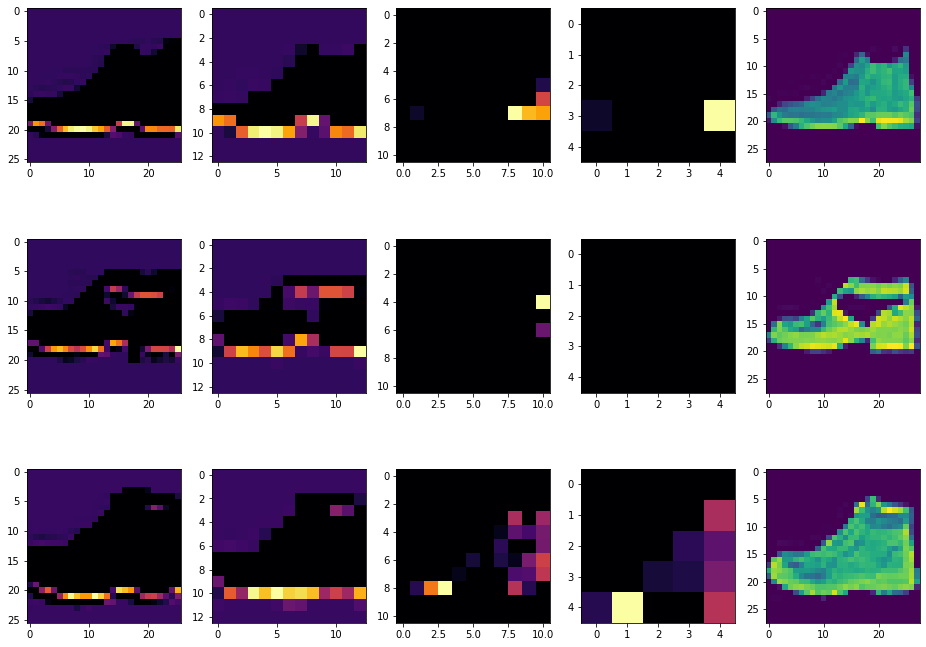

In [8]:
def show_image(img,r,c, ax):
      
    ax[r,c].imshow(val_images[img].reshape(28,28))
    ax[r,c].grid(False)


f, axarr = plt.subplots(3,5, figsize=(16, 12))

# Choose images to visualize filters for and plot 
FIRST_IMAGE=0
SECOND_IMAGE=23 
THIRD_IMAGE= 28 


CONVOLUTION_NUMBER = 5
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)


for x in range(0,4):
    f1 = activation_model.predict(val_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)
    f2 = activation_model.predict(val_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)
    f3 = activation_model.predict(val_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)


show_image(FIRST_IMAGE,0,4, axarr)
show_image(SECOND_IMAGE, 1, 4, axarr)
show_image(THIRD_IMAGE, 2, 4, axarr)

We can see the sole of the shoes being filtered out in the first two columns. Additional experiments can be done by replacing the images (indices) used with those belonging to dresses or shirts etc. 

